<a href="https://colab.research.google.com/github/AbhilashPal/Machine-Learning/blob/master/GPT2_Garments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install gpt-2-simple

  Created wheel for gpt-2-simple: filename=gpt_2_simple-0.7.1-cp36-none-any.whl size=23581 sha256=1518e0183fa69952c6830ce21e4dd7ca997a1616eabdd4d898f46f1a5c039ac7
  Stored in directory: /root/.cache/pip/wheels/0c/f8/23/b53ce437504597edff76bf9c3b8de08ad716f74f6c6baaa91a
Successfully built gpt-2-simple


In [ ]:
import gpt_2_simple as gpt2
import os
import requests

model_name = "124M"
if not os.path.isdir(os.path.join("models", model_name)):
	print(f"Downloading {model_name} model...")
	gpt2.download_gpt2(model_name=model_name)   # model is saved into current directory under /models/124M/


file_name = "Data2_encoded.txt"
if not os.path.isfile(file_name):
	url = "https://raw.githubusercontent.com/AbhilashPal/weblab/master/dat_encoded.txt"
	data = requests.get(url)
	
	with open(file_name, 'w') as f:
		f.write(data.text)
    



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Fetching checkpoint: 1.05Mit [00:00, 288Mit/s]                                                      


Fetching encoder.json: 1.05Mit [00:00, 104Mit/s]                                                    
Fetching hparams.json: 1.05Mit [00:00, 251Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:04, 107Mit/s]                                   
Fetching model.ckpt.index: 1.05Mit [00:00, 472Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 203Mit/s]                                                 
Fetching vocab.bpe: 1.05Mit [00:00, 240Mit/s]                                                       


In [ ]:
sess = gpt2.start_tf_sess()
gpt2.finetune(sess,
              file_name,
              model_name=model_name,
              steps=1000)   # steps is max number of training steps



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loading checkpoint models/124M/model.ckpt
INFO:tensorflow:Restoring parameters from models/124M/model.ckpt


  0%|          | 0/1 [00:00<?, ?it/s]

Loading dataset...


100%|██████████| 1/1 [00:04<00:00,  4.23s/it]


dataset has 1143792 tokens
Training...
[1 | 8.64] loss=1.88 avg=1.88
[2 | 10.81] loss=1.96 avg=1.92
[3 | 12.99] loss=1.70 avg=1.84
[4 | 15.17] loss=1.68 avg=1.80
[5 | 17.35] loss=1.84 avg=1.81
[6 | 19.55] loss=1.76 avg=1.80
[7 | 21.75] loss=1.63 avg=1.78
[8 | 23.95] loss=1.63 avg=1.76
[9 | 26.16] loss=1.59 avg=1.74
[10 | 28.37] loss=1.53 avg=1.72
[11 | 30.58] loss=1.67 avg=1.71
[12 | 32.80] loss=1.72 avg=1.71
[13 | 35.02] loss=1.24 avg=1.67
[14 | 37.24] loss=1.36 avg=1.65
[15 | 39.47] loss=1.34 avg=1.63
[16 | 41.71] loss=1.19 avg=1.60
[17 | 43.95] loss=1.40 avg=1.59
[18 | 46.20] loss=1.26 avg=1.57
[19 | 48.44] loss=1.27 avg=1.55
[20 | 50.69] loss=1.25 avg=1.53
[21 | 52.97] loss=1.20 avg=1.52
[22 | 55.23] loss=0.91 avg=1.49
[23 | 57.50] loss=1.21 avg=1.47
[24 | 59.77] loss=1.10 avg=1.45
[25 | 62.04] loss=1.22 avg=1.44
[26 | 64.31] loss=1.11 avg=1.43
[27 | 66.58] loss=1.06 avg=1.41
[28 | 68.86] loss=1.15 avg=1.40
[29 | 71.15] loss=1.12 avg=1.39
[30 | 73.44] loss=1.18 avg=1.38
[31 | 75.73

In [ ]:
!zip -r musemodel.zip /content/checkpoint

  adding: content/checkpoint/ (stored 0%)
  adding: content/checkpoint/run1/ (stored 0%)
  adding: content/checkpoint/run1/vocab.bpe (deflated 53%)
  adding: content/checkpoint/run1/events.out.tfevents.1581086327.b485988a71f9 (deflated 61%)
  adding: content/checkpoint/run1/encoder.json (deflated 67%)
  adding: content/checkpoint/run1/checkpoint (deflated 40%)
  adding: content/checkpoint/run1/model-1000.meta (deflated 91%)
  adding: content/checkpoint/run1/model-1000.index (deflated 62%)
  adding: content/checkpoint/run1/model-1000.data-00000-of-00001 (deflated 7%)
  adding: content/checkpoint/run1/counter (stored 0%)
  adding: content/checkpoint/run1/hparams.json (deflated 28%)


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive as dr
dr.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'musemodel.zip'})
uploaded.SetContentFile('musemodel.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1Qjn8q95ULaBCIFbva8kpz7h2Te9kOUy8


In [ ]:
!cp /content/drive/My*Drive/Models/file1000.zip /content/checkpoint

In [ ]:
!unzip /content/checkpoint/file1000.zip

Archive:  /content/checkpoint/file1000.zip
   creating: content/checkpoint/
   creating: content/checkpoint/run1/
 extracting: content/checkpoint/run1/counter  
  inflating: content/checkpoint/run1/model-1000.meta  
  inflating: content/checkpoint/run1/hparams.json  
  inflating: content/checkpoint/run1/encoder.json  
  inflating: content/checkpoint/run1/events.out.tfevents.1579265029.ed922aed462e  
  inflating: content/checkpoint/run1/vocab.bpe  
  inflating: content/checkpoint/run1/model-1000.index  
  inflating: content/checkpoint/run1/checkpoint  
  inflating: content/checkpoint/run1/model-1000.data-00000-of-00001  


How to Restore Weights??

In [ ]:
import tensorflow as tf

tf.reset_default_graph()

In [ ]:

sess2 = gpt2.start_tf_sess()



In [ ]:
gpt2.load_gpt2(sess2,run_name ="run1")

Loading checkpoint checkpoint/run1/model-1000
INFO:tensorflow:Restoring parameters from checkpoint/run1/model-1000


In [ ]:

t=gpt2.generate(sess2,
              temperature=0.7,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Atithi Flip FlopsIdeal For Girls Women , Sole Material Rubber EVA , Number of Contents in Sales Package Pack of 1 , Weight 75 g per single Slipper Weight of the product may vary depending on size , Type Flip Flops , Heel Height 1 8 inch , Strap Material Soft Rubber Strap , Color Red 1 Pair Flip Flops , Other Details Make In India Product , Care Instructions Wash in running water Avoid Use Of Any Hard Detergents Or Solvents For Better Longevity Of The Print Or Design  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n',
              return_as_list=True)[0]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
t

' Key Features of Atithi Flip Flops Ideal For: Girls, Women Type: Flip Flops Heel Height: 1.8,Specifications of Atithi Flip Flops General Ideal For Girls, Women Slipper Details Sole Material Rubber, EVA Number of Contents in Sales Package Pack of 1 Weight 75 g (per single Slipper) - Weight of the product may vary depending on size. Type Flip Flops Heel Height 1.8 inch Strap Material Soft Rubber Strap Color Red In the Box 1 Pair Flip Flops Additional Details Other Details Make In India Product Care Instructions Wash in running water, Avoid Use Of Any Hard Detergents, Solvents For Better Longevity Of The Print Or Design.'

# Outputs(~850 Epochs)


Atithi Flip Flops

In [ ]:
gpt2.generate(sess,
              temperature=0.7,
              top_k=1,
              nsamples=2,
              batch_size=2,
              length=200,
              prefix="<|startoftext|>~^~@Atithi Flip FlopsIdeal For Girls Women , Sole Material Rubber EVA , Number of Contents in Sales Package Pack of 1 , Weight 75 g per single Slipper Weight of the product may vary depending on size , Type Flip Flops , Heel Height 1 8 inch , Strap Material Soft Rubber Strap , Color Red 1 Pair Flip Flops , Other Details Make In India Product , Care Instructions Wash in running water Avoid Use Of Any Hard Detergents Or Solvents For Better Longevity Of The Print Or Design  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

 Key Features of Atithi Flip Flops Material: EVA Heel Height: 1.8 inch Color: Red, Red, Red, Red,Specifications of Atithi Flip Flops General Ideal For Girls, Women Slipper & Flip Flop Details Sole Material Rubber, EVA Number of Contents in Sales Package Pack of 1 Weight 75 g (per single Slipper) - Weight of the product may vary depending on size. Type Flip Flops Heel Height 1.8 inch Strap Material Soft Rubber Strap Color Red In the Box 1 Pair Flip Flops Additional Details Other Details Make In India Product Care Instructions Wash in running water, Avoid Use Of Any Hard Detergents Or Solvents For Better Longevity Of The Print Or Design

 Key Features of Atithi Flip Flops Material: EVA Heel Height: 1.8 inch Color: Red, Red, Red, Red,Specifications of Atithi Flip Flops General Ideal For Girls, Women Slipper & Flip Flop Details Sole Material Rubber, EVA Number of Contents in Sales Package Pack of 1 Weight 75 g (per single Slipper) - Weight of the product may vary depending on size. Type Fl

Deodorant

In [ ]:
gpt2.generate(sess,
              temperature=0.6,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^30-Day Free-Shipping Women~@Addiction Rio,Vegas Gift Set  Combo SetNumber of Contents in Set 2 , Gift Set Content 2 Deodrant , Combo Set Content 1 Rio Deodrant 1 Vegas Deodrant , Ideal For Men Women  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

 Flipkart.com: Buy Addiction Rio,Vegas Gift Set Combo Set online only for Rs. 330 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!


Casual Shirt

In [ ]:
gpt2.generate(sess,
              temperature=0.6,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Eves Pret A Porter Women's Checkered Casual ShirtPattern Checkered , Ideal For Women s , Occasion Casual , Sleeve Half Sleeve , Number of Contents in Sales Package Pack of 1 , Brand Fit Regular , Fabric 100 Cotton , Fit Regular Shirt , Style Code 99 RED ======",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

  Eves Pret A Porter Women's Checkered Casual Shirt - Buy Red Eves Pret A Porter Women's Checkered Casual Shirt For Only Rs. 1299 Online in India. Shop Online For Apparels. Huge Collection of Branded Clothes Only at Flipkart.com


Women's Kurti

In [ ]:
gpt2.generate(sess,
              temperature=0.6,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Menka Embroidered Women's Kurti1 Kurti 30 Days Warranty Policy , Sleeve 3 4 Sleeve , Region Traditional , Number of Contents in Sales Package Pack of 1 , Fabric Cotton , Neck Round Neck , Pattern Embroidered , Ideal For Women s Handwash with Similar Colors  ========",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

  Key Features of Menka Embroidered Women's Kurti White, Black, White, White, Menka Embroidered Women's Kurti Price: Rs. 599 Menka presents to you a brand new range of menka prints. These prints are made using cotton rich stitched prints and printed on high quality cotton. These prints are ideal for daily wear and is made using high grade high quality fabric. The prints are high on quality and will last for years. The print quality is high and the stitched fabric is extremely soft. The prints are also very comfortable. We recommend buying this Print of menka prints only for Rs. 599 from Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!


Back Cover for Apple iPad

In [ ]:
gpt2.generate(sess,
              temperature=0.6,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^manufacturing Learn Learn-lessons~@DailyObjects Back Cover for Apple iPad 2, 3, 4Brand DailyObjects , Shade Grey , Material Plastic , Designed for Apple iPad 2 3 4 , Model ID Life Case For iPad 2 3 4 , Color Grey , Covered in Warranty Warranty of the product is limited to manufacturing defects only , Warranty Summary 1 Year Warranty , Waterproof Yes  ========",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

  DailyObjects Back Cover for Apple iPad 2, 3, 4 (Grey) Price: Rs. 599 Protected from tampering with or breakage, this case keeps your Apple iPad 2 3 4 safe. The Apple iPad 2 3 4 is equipped with a high-quality body and is resistant to damage. The Apple iPad 2 3 4 is equipped with a high-quality magnetic latch system that prevents the introduction of new products. The Apple iPad 2 3 4 is equipped with a high-quality embedded circuit board that can be used to store and read digital art, including photographs, audio and video, images and documents. The Apple iPad 2 3 4 is equipped with a high-quality embedded circuit board that can be used to store and read digital art, including photographs, audio and video, images and documents.


# Outputs(~1000 Epochs) -> Temperature 0.6 ~ 0.7
 

Atithi Flip Flops

In [ ]:
gpt2.generate(sess,
              temperature=0.7,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Atithi Flip FlopsIdeal For Girls Women , Sole Material Rubber EVA , Number of Contents in Sales Package Pack of 1 , Weight 75 g per single Slipper Weight of the product may vary depending on size , Type Flip Flops , Heel Height 1 8 inch , Strap Material Soft Rubber Strap , Color Red 1 Pair Flip Flops , Other Details Make In India Product , Care Instructions Wash in running water Avoid Use Of Any Hard Detergents Or Solvents For Better Longevity Of The Print Or Design  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

<|startoftext|>~^~@Atithi Flip FlopsIdeal For Girls Women , Sole Material Rubber EVA , Number of Contents in Sales Package Pack of 1 , Weight 75 g per single Slipper Weight of the product may vary depending on size , Type Flip Flops , Heel Height 1 8 inch , Strap Material Soft Rubber Strap , Color Red 1 Pair Flip Flops , Other Details Make In India Product , Care Instructions Wash in running water Avoid Use Of Any Hard Detergents Or Solvents For Better Longevity Of The Print Or Design  ========  Key Features of Atithi Flip Flops Ideal For: Women Heel Height: 1.8,Atithi Flip Flops Price: Rs. 599 AtITHi is the leading brand in the footwear industry. The brand is known for its high quality footwear, which have made a name for themselves in sports, sports memorabilia and fashion. AtITHi brings to you the exclusive range of footwear from the best brands in the world. AtITHi has a track record of success on the footy field with its design and fashion products. This is not only because its fo

Deodorant



In [ ]:
gpt2.generate(sess,
              temperature=0.6,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^30-Day Free-Shipping Women~@Addiction Rio,Vegas Gift Set  Combo SetNumber of Contents in Set 2 , Gift Set Content 2 Deodrant , Combo Set Content 1 Rio Deodrant 1 Vegas Deodrant , Ideal For Men Women  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

 Flipkart.com: Buy Addiction Rio,Vegas Gift Set Combo Set online only for Rs. 310 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!


Casual Shirt

In [ ]:
gpt2.generate(sess,
              temperature=0.6,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Eves Pret A Porter Women's Checkered Casual ShirtPattern Checkered , Ideal For Women s , Occasion Casual , Sleeve Half Sleeve , Number of Contents in Sales Package Pack of 1 , Brand Fit Regular , Fabric 100 Cotton , Fit Regular Shirt , Style Code 99 RED ======",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

  Eves Pret A Porter Women's Checkered Casual Shirt - Buy Red Eves Pret A Porter Women's Checkered Casual Shirt For Only Rs. 1299 Online in India. Shop Online For Apparels. Huge Collection of Branded Clothes Only at Flipkart.com


Womens Kurti

In [ ]:
gpt2.generate(sess,
              temperature=0.6,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Menka Embroidered Women's Kurti1 Kurti 30 Days Warranty Policy , Sleeve 3 4 Sleeve , Region Traditional , Number of Contents in Sales Package Pack of 1 , Fabric Cotton , Neck Round Neck , Pattern Embroidered , Ideal For Women s Handwash with Similar Colors  ========",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

  Key Features of Menka Embroidered Women's Kurti 100% cotton,Menka Embroidered Women's Kurti Price: Rs. 499 Menka Embroidered Kurti is a Trendy Trendy Designer Trendy Designer Trendy Designer Women's Printed Women's Kurti Is a Trendy Trendy Designer Trendy Designer,Specifications of Menka Embroidered Women's Kurti Kurti Details Sleeve 3/4 Sleeve Region Traditional Number of Contents in Sales Package Pack of 1 Fabric Cotton Neck Round Neck General Details Pattern Embroidered Ideal For Women's Fabric Care Handwash with Similar Colors


Ipad Cover

In [ ]:
gpt2.generate(sess,
              temperature=0.6,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^manufacturing Learn Learn-lessons~@DailyObjects Back Cover for Apple iPad 2, 3, 4Brand DailyObjects , Shade Grey , Material Plastic , Designed for Apple iPad 2 3 4 , Model ID Life Case For iPad 2 3 4 , Color Grey , Covered in Warranty Warranty of the product is limited to manufacturing defects only , Warranty Summary 1 Year Warranty , Waterproof Yes  ========",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

<|startoftext|>~^manufacturing Learn Learn-lessons~@DailyObjects Back Cover for Apple iPad 2, 3, 4Brand DailyObjects , Shade Grey , Material Plastic , Designed for Apple iPad 2 3 4 , Model ID Life Case For iPad 2 3 4 , Color Grey , Covered in Warranty Warranty of the product is limited to manufacturing defects only , Warranty Summary 1 Year Warranty , Waterproof Yes  ========  DailyObjects Back Cover for Apple iPad 2, 3, 4 (Grey) Price: Rs. 1,685 About DailyObjects: This slim back cover is a product of DailyObjects.com, India’s largest seller of designer and customisable smartphone cases. DailyObjects has a curated collection of exclusive licensed art that we have painstakingly sourced from artists that we love, from around the world. We currently have over 3000 amazing designs from over 50 artists from 25 countries across the world, available for more than 50 different models of smartphones. About DailyObjects: This slim back cover is a product of DailyObjects.com, India’s largest sel

# Outputs(~1000 Epochs) -> Temperature 0.2

Atithi Flip Flops

In [ ]:
gpt2.generate(sess,
              temperature=0.2,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Atithi Flip FlopsIdeal For Girls Women , Sole Material Rubber EVA , Number of Contents in Sales Package Pack of 1 , Weight 75 g per single Slipper Weight of the product may vary depending on size , Type Flip Flops , Heel Height 1 8 inch , Strap Material Soft Rubber Strap , Color Red 1 Pair Flip Flops , Other Details Make In India Product , Care Instructions Wash in running water Avoid Use Of Any Hard Detergents Or Solvents For Better Longevity Of The Print Or Design  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

 Key Features of Atithi Flip Flops Material: Rubber Heel Height: 1.8,Atithi Flip Flops Price: Rs. 599 This is a Flip Flop for Girls Women. Made in India. Made in India. This is a Flip Flop for Girls Women. Made in India.


Deodorant



In [ ]:
gpt2.generate(sess,
              temperature=0.2,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^30-Day Free-Shipping Women~@Addiction Rio,Vegas Gift Set  Combo SetNumber of Contents in Set 2 , Gift Set Content 2 Deodrant , Combo Set Content 1 Rio Deodrant 1 Vegas Deodrant , Ideal For Men Women  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

 Flipkart.com: Buy Addiction Rio,Vegas Gift Set Combo Set online only for Rs. 350 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!


Casual Shirt

In [ ]:
gpt2.generate(sess,
              temperature=0.2,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Eves Pret A Porter Women's Checkered Casual ShirtPattern Checkered , Ideal For Women s , Occasion Casual , Sleeve Half Sleeve , Number of Contents in Sales Package Pack of 1 , Brand Fit Regular , Fabric 100 Cotton , Fit Regular Shirt , Style Code 99 RED ======",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

  Eves Pret A Porter Women's Checkered Casual Shirt - Buy Red Eves Pret A Porter Women's Checkered Casual Shirt For Only Rs. 899 Online in India. Shop Online For Apparels. Huge Collection of Branded Clothes Only at Flipkart.com


Womens Kurti

In [ ]:
gpt2.generate(sess,
              temperature=0.2,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Menka Embroidered Women's Kurti1 Kurti 30 Days Warranty Policy , Sleeve 3 4 Sleeve , Region Traditional , Number of Contents in Sales Package Pack of 1 , Fabric Cotton , Neck Round Neck , Pattern Embroidered , Ideal For Women s Handwash with Similar Colors  ========",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

  Key Features of Menka Embroidered Women's Kurti 30 Days Warranty,Menka Embroidered Women's Kurti Price: Rs. 1,099 Menka Embroidered Women's Kurti,Specifications of Menka Embroidered Women's Kurti Kurti Details Sleeve 3/4 Sleeve General Details Region Traditional Number of Contents in Sales Package Pack of 1 Fabric Cotton Neck Round Neck Pattern Embroidered Ideal For Women's Fabric Care Handwash with Similar Colors


Ipad Cover

In [ ]:
gpt2.generate(sess,
              temperature=0.2,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^manufacturing Learn Learn-lessons~@DailyObjects Back Cover for Apple iPad 2, 3, 4Brand DailyObjects , Shade Grey , Material Plastic , Designed for Apple iPad 2 3 4 , Model ID Life Case For iPad 2 3 4 , Color Grey , Covered in Warranty Warranty of the product is limited to manufacturing defects only , Warranty Summary 1 Year Warranty , Waterproof Yes  ========",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

<|startoftext|>~^manufacturing Learn Learn-lessons~@DailyObjects Back Cover for Apple iPad 2, 3, 4Brand DailyObjects , Shade Grey , Material Plastic , Designed for Apple iPad 2 3 4 , Model ID Life Case For iPad 2 3 4 , Color Grey , Covered in Warranty Warranty of the product is limited to manufacturing defects only , Warranty Summary 1 Year Warranty , Waterproof Yes  ========  DailyObjects Back Cover for Apple iPad 2, 3, 4 (Grey) Price: Rs. 1,685 About DailyObjects: This slim back cover is a product of DailyObjects.com, India’s largest seller of designer and customisable smartphone cases. DailyObjects has a curated collection of exclusive licensed art that we have painstakingly sourced from artists that we love, from around the world. We currently have over 3000 amazing designs from over 50 artists from 25 countries across the world, available for more than 50 different models of smartphones. About DailyObjects: This slim back cover is a product of DailyObjects.com, India’s largest sel

# Outputs(~1000 Epochs) -> Temperature 1.5

Atithi Flip Flops

In [ ]:
gpt2.generate(sess,
              temperature=1.5,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Atithi Flip FlopsIdeal For Girls Women , Sole Material Rubber EVA , Number of Contents in Sales Package Pack of 1 , Weight 75 g per single Slipper Weight of the product may vary depending on size , Type Flip Flops , Heel Height 1 8 inch , Strap Material Soft Rubber Strap , Color Red 1 Pair Flip Flops , Other Details Make In India Product , Care Instructions Wash in running water Avoid Use Of Any Hard Detergents Or Solvents For Better Longevity Of The Print Or Design  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

<|startoftext|>~^~@Atithi Flip FlopsIdeal For Girls Women , Sole Material Rubber EVA , Number of Contents in Sales Package Pack of 1 , Weight 75 g per single Slipper Weight of the product may vary depending on size , Type Flip Flops , Heel Height 1 8 inch , Strap Material Soft Rubber Strap , Color Red 1 Pair Flip Flops , Other Details Make In India Product , Care Instructions Wash in running water Avoid Use Of Any Hard Detergents Or Solvents For Better Longevity Of The Print Or Design  ========  Info@Hako Casual Full Sleeve Women's Full Sleeve Solid T-ShirtSleeve Full Sleeve , Number of Contents in Sales Package 7 , Fabric Cotton Blend , Type Full Sleeve , Fabric COTTON , Pattern Self Design , Ideal For Women s Hand Wash Cool Machine Wash at 30 C Wash with Similar Colors Use Detergen Do Not Bleach  ========  Specifications of Hatshop Casual Full Sleeve Women's Full Sleeve Solid T-Shirt T-shirt Details Sleeve Full Sleeve General Details Number of Contents in Sales Package – 7 Fabric Cot

Deodorant

In [ ]:
gpt2.generate(sess,
              temperature=1.5,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^30-Day Free-Shipping Women~@Addiction Rio,Vegas Gift Set  Combo SetNumber of Contents in Set 2 , Gift Set Content 2 Deodrant , Combo Set Content 1 Rio Deodrant 1 Vegas Deodrant , Ideal For Men Women  ======== ",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

 Key Features of Addictions Rio,Vaetalia Gifts Combo Set Women's Number : 1008,Addiction Rio,Vaetalia Gifts Combo Set Price: Rs. 1,520 Make life a complete success with this stunning collection by the incredible Addiction Deodrant by Rio . Made of the finest materials of the Antilles are durable and worth a dedicated effort by this group to perfection . Add the love of yours in one piece, these really are the greatest happiness.


Womens Kurti

In [ ]:
gpt2.generate(sess,
              temperature=1.5,
              top_k=40,
              nsamples=1,
              batch_size=1,
              length=200,
              prefix="<|startoftext|>~^~@Menka Embroidered Women's Kurti1 Kurti 30 Days Warranty Policy , Sleeve 3 4 Sleeve , Region Traditional , Number of Contents in Sales Package Pack of 1 , Fabric Cotton , Neck Round Neck , Pattern Embroidered , Ideal For Women s Handwash with Similar Colors  ========",
              truncate="<|endoftext|>",
              include_prefix=False,
              sample_delim='\n'
              )

  Key Features of Menka Embroidered Women's Kurtic Fabric: COFFEE+DARK fabric Care Instructions: Hand Wash with Similar Colors & Stitch or do not Bleach. Durable Comfortable Fabric - Weight: 40 g-- Size Chart:13 & 14.1 cm,Menka Embroidered Women's Kurti Price: Rs. 399 Hand Wash with Similar Colors & Dressy,Specifications of Menka Embroidered Women's Kurti Kurti General Details 1 Kurti Fabric Care Sew Style Code MKTSD058 In the Box 300 Machine Washable Non Chlorine Bleach


# Charts and Graphs

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
epoch = [
      1,10,20,30,40,50,60,70,80        
]
L1 = [
      2.643,1.052,0.853,0.769,0.727,0.649,0.592,0.562,0.515
]
L2 =[
     0.290,0.674,0.722,0.744,0.760,0.786,0.807,0.828,0.828
]


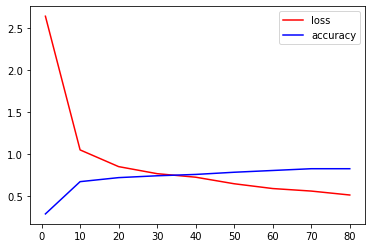

In [ ]:
plt.plot(epoch, L1, 'r', label='loss') # plotting t, a separately 
plt.plot(epoch, L2, 'b', label='accuracy') # plotting t, b separately
plt.legend(loc="upper right")

In [ ]:
epoch = [
      1,100,200,300,400,500,600,700,800,900,1000        
]
L1 = [
    1.88,0.8,0.87,0.6,0.53,0.61,0.49,0.48,0.45,0.35,0.25      
]
L2 =[
    1.88,1.02,0.82,0.73,0.65,0.61,0.55,0.51,0.46,0.41,0.37
]



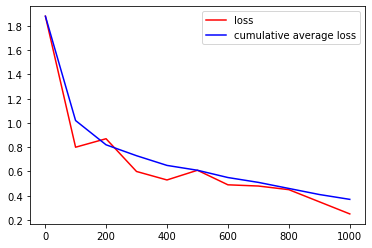

In [ ]:
plt.plot(epoch, L1, 'r', label='loss') # plotting t, a separately 
plt.plot(epoch, L2, 'b', label='cumulative average loss') # plotting t, b separately
plt.legend(loc="upper right")